In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [2]:
df = pd.read_csv("dataset.csv", index_col = "timestamp", parse_dates=True)
df.head()

,Unnamed: 0,value
timestamp,,
2014-07-01 00:00:00,0,10844
2014-07-01 00:30:00,1,8127
2014-07-01 01:00:00,2,6210
2014-07-01 01:30:00,3,4656
2014-07-01 02:00:00,4,3820


In [3]:
df.drop("Unnamed: 0", axis=1, inplace = True)

In [4]:
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [5]:
df.shape

(10320, 1)

In [6]:
df['value-1']=df['value'].shift(+1)
df['value-2']=df['value'].shift(+2)
df['value-3']=df['value'].shift(+3)

In [11]:
df.head()

,value,value-1,value-2,value-3
timestamp,,,,
2014-07-01 01:30:00,4656,6210.0,8127.0,10844.0
2014-07-01 02:00:00,3820,4656.0,6210.0,8127.0
2014-07-01 02:30:00,2873,3820.0,4656.0,6210.0
2014-07-01 03:00:00,2369,2873.0,3820.0,4656.0
2014-07-01 03:30:00,2064,2369.0,2873.0,3820.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10320 entries, 2014-07-01 00:00:00 to 2015-01-31 23:30:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   value    10320 non-null  int64  
 1   value-1  10319 non-null  float64
 2   value-2  10318 non-null  float64
 3   value-3  10317 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 403.1 KB


In [9]:
df.isnull().sum()

value      0
value-1    1
value-2    2
value-3    3
dtype: int64

In [10]:
df=df.dropna()
df

,value,value-1,value-2,value-3
timestamp,,,,
2014-07-01 01:30:00,4656,6210.0,8127.0,10844.0
2014-07-01 02:00:00,3820,4656.0,6210.0,8127.0
2014-07-01 02:30:00,2873,3820.0,4656.0,6210.0
2014-07-01 03:00:00,2369,2873.0,3820.0,4656.0
2014-07-01 03:30:00,2064,2369.0,2873.0,3820.0
...,...,...,...,...
2015-01-31 21:30:00,24670,23719.0,23291.0,24985.0
2015-01-31 22:00:00,25721,24670.0,23719.0,23291.0
2015-01-31 22:30:00,27309,25721.0,24670.0,23719.0


In [12]:
df.isnull().sum()

value      0
value-1    0
value-2    0
value-3    0
dtype: int64

<AxesSubplot:xlabel='value'>

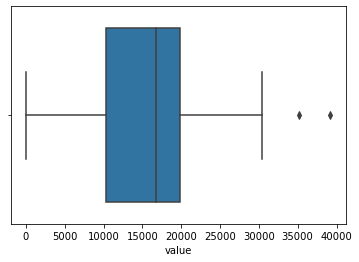

In [13]:
sns.boxplot(x=df["value"])

In [14]:
filter1 = (df>30000)
filter1.value_counts()

value  value-1  value-2  value-3
False  False    False    False      10303
                         True           3
True   False    False    False          3
False  False    True     True           2
       True     True     False          2
True   True     False    False          2
False  False    True     False          1
       True     False    False          1
dtype: int64

In [16]:
x1,x2,x3 = df['value-1'],df['value-2'],df['value-3']
y = df['value']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3), axis = 1)
print(final_x)

[[ 6210.  8127. 10844.]
 [ 4656.  6210.  8127.]
 [ 3820.  4656.  6210.]
 ...
 [25721. 24670. 23719.]
 [27309. 25721. 24670.]
 [26591. 27309. 25721.]]


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_x,y, test_size=0.2)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=23, max_features=3)

In [19]:
rfr.fit(x_train, y_train)

<ipython-input-19-da087e9fd0ca>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


RandomForestRegressor(max_features=3, random_state=23)

In [20]:
y_pred = rfr.predict(x_test)
y_pred

array([25576.91,  3431.07, 20056.66, ...,  2851.15,  8001.  , 25941.45])

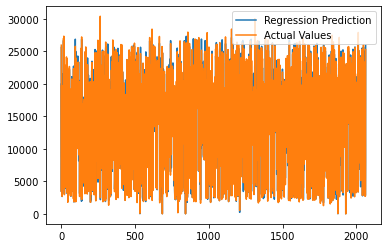

In [25]:
pred = rfr.predict(x_test)
import matplotlib.pyplot as plt
plt.plot(y_pred, label = "Regression Prediction")
plt.plot(y_test, label = "Actual Values")
plt.legend(loc="upper right")
plt.show()

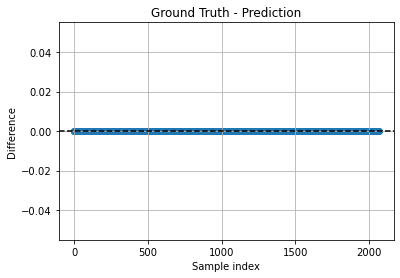

In [34]:
diff = y_pred - pred

plt.scatter(range(len(diff)), diff)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Ground Truth - Prediction')
plt.xlabel('Sample index')
plt.ylabel('Difference')
plt.grid(True)

plt.show()


In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9790784754186493